In [ ]:
#Tyler code
import matplotlib as plt
import numpy
import seaborn as sns
import pandas as pd
import numpy as np



fig = plt.figure(figsize = (8, 4), dpi= 300)
fig.patch.set_facecolor('white')
plt.title('Empirical Measurments')
sns.violinplot(data         = MD_Boxplot, 
               density_norm = "area",
               cut          = 0,
               fill         = True,
               inner        = 'quart',
               alpha        = 0.5,
               zorder       = 1)
sns.boxplot(data         = MD_Boxplot, 
            showfliers   = False, 
            whis         = 0, 
            medianprops  = {"color": "black"}, 
            boxprops     = {"edgecolor": "black", 'zorder': 2, 'alpha': 1},
            whiskerprops = {"color": "black"}, 
            capprops     = {"color": "black"},
            width        = 0.3)
for index in range(len(Path_List)):
    y = pd.DataFrame(MD_Boxplot.iloc[basal_start:basal_end, index])
    y = np.array(y)[:, 0]
    y = np.round(y, 2)
    x = np.ones(y.shape) * -0.075 * 1.25 + index
    plt.scatter(x, y, color = "black", marker = 'D', 
                edgecolor='black', facecolor='none',
                label = 'Basal', s = 20, zorder = 3) 

    y = pd.DataFrame(MD_Boxplot.iloc[mid_start:mid_end, index])
    y = np.array(y)[:, 0]
    y = np.round(y, 2)
    x = np.ones(y.shape) * 0 + index
    plt.scatter(x, y, color = "black", marker = 's', 
                edgecolor='black', facecolor='none',
                label = 'Mid-Ventricular', s = 20, zorder = 3)   
    
    y = pd.DataFrame(MD_Boxplot.iloc[apical_start:apical_end, index])
    y = np.array(y)[:, 0]
    y = np.round(y, 2)
    x = np.ones(y.shape) * 0.075 * 1.25 + index
    plt.scatter(x, y, color = "black", marker = '*', e
                edgecolor='black', facecolor='none',
                label = 'Apical', s = 45, zorder = 3) 
plt.xlim([-0.5, 5.5])
x_ticks = [0, 1, 2, 3, 4, 5]
plt.ylim(1.0, 2.2)
plt.xticks(ticks = x_ticks, labels = dataset_list)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), ncol = 3, loc = 9)
# plt.axis('equal')

plt.ylabel('Mean Diffusivity [$μm^2 / ms$]')
plt.tight_layout()
plt.show()

In [41]:
def Data_Representation(Data_List):
    from numpy import zeros as ZEROS
    from numpy import copy  as COPY
    number_of_volunteers = len(Data_List)
    number_of_slices     = len(Data_List[0]) 
    Data_Matrix          = ZEROS((number_of_volunteers, number_of_slices))
    Pooled_Labels        = []
    for vol in range(number_of_volunteers):
        for slc in range(number_of_slices):
            Pooled_Labels.append([vol, slc])
            Data_Matrix[vol, slc] = Data_List[vol][slc]
    Data_Per_Slice     = COPY(Data_Matrix.T)
    Data_Per_Volunteer = COPY(Data_Matrix)
    Data_Pooled        = COPY(Data_Matrix.flatten())
    Data = dict()
    Data['Pooled']     = Data_Pooled 
    Data['Slice']      = Data_Per_Slice
    Data['Volunteer']  = Data_Per_Volunteer
    Data['Pooled Key'] = Pooled_Labels
    return Data

In [ ]:
#Making json file into csv:


import json
import pandas as pd

json_path = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run8/Dataset008_MDandAverageLVANDIPPrediction/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/summary.json'

# Load the JSON data
with open(json_path, 'r') as f:
    data = json.load(f)
# Initialize lists to hold the data
case_ids = []
labels = []
dice_scores = []

# Iterate over each case in 'metric_per_case'
for case_index, case in enumerate(data['metric_per_case']):
    # You can extract a case ID from the file name or use the index
    prediction_file = case['prediction_file']
    case_id = prediction_file.split('/')[-1]  # Get the file name as case ID
    # Remove file extension if needed
    case_id = case_id.replace('.nii.gz', '')
    
    metrics = case['metrics']
    for label, metric_values in metrics.items():
        dice = metric_values['Dice']
        case_ids.append(case_id)
        labels.append(f'Label {label}')
        dice_scores.append(dice)

# Create a DataFrame
df = pd.DataFrame({
    'Case ID': case_ids,
    'Label': labels,
    'Dice Score': dice_scores
})

# Save the DataFrame to a CSV file
csv_file_path = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run8/Dataset008_MDandAverageLVANDIPPrediction/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv'
df.to_csv(csv_file_path, index=False)

print(f'Data saved to {csv_file_path}')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data
main=  '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
csv_file_path = f'{main}/Run12/dice_scores_per_case.csv' 
df = pd.read_csv(csv_file_path)

# Preview the data
print(df.head())

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the boxplot
sns.boxplot(x='Label', y='Dice Score', data=df, showmeans=True)

# Add individual data points
sns.stripplot(x='Label', y='Dice Score', data=df, color='black', alpha=0.5, jitter=True)

# Customize the plot
plt.title('Dice Score Distribution per Label')
plt.xlabel('Segmentation Labels')
plt.ylabel('Dice Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

# (Optional) Save the plot to a file
# output_plot_path = '/path/to/save/dice_score_boxplot.png'
# plt.savefig(output_plot_path, dpi=300, bbox_inches='tight')
# print(f'Plot saved to {output_plot_path}')


In [ ]:
# Set up the figure
fig = plt.figure(figsize=(8, 4), dpi=300)
fig.patch.set_facecolor('white')
plt.title('Dice Score Distribution per Label')

# Create the violin plot
sns.violinplot(x='Label', y='Dice Score', data=df,
               cut=0,
               inner='quartile',
               alpha=0.5,
               zorder=1)

# Create the boxplot on top of the violin plot
sns.boxplot(x='Label', y='Dice Score', data=df,
            showfliers=False,
            whis=0,
            medianprops={"color": "black"},
            boxprops={"edgecolor": "black", 'zorder': 2, 'alpha': 1},
            whiskerprops={"color": "black"},
            capprops={"color": "black"},
            width=0.3)

# Optional: Add individual data points using stripplot
sns.stripplot(x='Label', y='Dice Score', data=df,
              color='black', alpha=0.5, jitter=True, zorder=3)

# Set axes labels and limits
plt.xlabel('Label')
plt.ylabel('Dice Score')
plt.ylim(0, 1)  # Assuming Dice scores range from 0 to 1

# Remove the legend (since we no longer have multiple datasets or regions)
plt.legend([], [], frameon=False)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load your CSV data into a DataFrame
csv_file_path = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run10/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv'
df = pd.read_csv(csv_file_path)

# Since you have only one dataset, create a 'Dataset' column for plotting
df['Dataset'] = 'My Data'

# Define marker and offset mappings for labels
marker_mapping = {
    'Label 1': '*',   # Star for LV
    'Label 2': '^',   # Triangle up for Anterior Insertion Point
    'Label 3': 'D'    # Diamond for Inferior Insertion Point
}

offset_mapping = {
    'Label 1': -0.1,
    'Label 2': 0,
    'Label 3': 0.1
}

# Set up the plot
plt.figure(figsize=(8, 4), dpi=300)
plt.title('Dice Scores per Structure')

# Create the violin plot for all data
sns.violinplot(
    x='Dataset',
    y='Dice Score',
    data=df,
    cut=0,
    inner='quartile',
    scale='area',
    color='skyblue',
    alpha=0.5,
    zorder=1
)

# Add the boxplot on top
sns.boxplot(
    x='Dataset',
    y='Dice Score',
    data=df,
    width=0.1,
    showfliers=False,
    whis=0,
    medianprops={"color": "black"},
    boxprops={"edgecolor": "black", 'zorder': 2, 'alpha': 1},
    whiskerprops={"color": "black"},
    capprops={"color": "black"},
    zorder=2
)

# Plot individual data points with different markers for each label
x_pos = 0  # x position for 'My Data'
labels = df['Label'].unique()

for label in labels:
    y = df[df['Label'] == label]['Dice Score']
    x = np.ones(len(y)) * x_pos + offset_mapping[label]
    plt.scatter(
        x,
        y,
        color='black',
        marker=marker_mapping[label],
        edgecolor='black',
        facecolor='none',
        s=45,
        zorder=3,
        label=label
    )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    ncol=3,
    loc='upper center',
    title='Structures'
)

# Adjust x-axis limits and labels
plt.xlim(-0.5, 0.5)
plt.xticks([x_pos], ['Dataset'])

# Set labels and layout
plt.ylabel('Dice Score')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# List of CSV file paths
csv_file_paths = [
    '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run10/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv',
    '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults/Run8/Dataset008_MDandAverageLVANDIPPrediction/nnUNetTrainer_100epochs__nnUNetPlans__2d/fold_5/validation/dice_scores_per_case.csv',
]

# Corresponding dataset names for labeling
dataset_names = [
    'Dataset 10',
    'Dataset 8',
]

# Define a color palette for each dataset (used in violin and box plots)
dataset_palette = {
    'Dataset 10': 'skyblue',
    'Dataset 8': 'lightgreen',
}

# Initialize a list to hold DataFrames
df_list = []

# Loop over the file paths and dataset names
for csv_file_path, dataset_name in zip(csv_file_paths, dataset_names):
    # Load the CSV data into a DataFrame
    df = pd.read_csv(csv_file_path)
    # Add a 'Dataset' column
    df['Dataset'] = dataset_name
    # Append to the list
    df_list.append(df)

# Concatenate all DataFrames
df_all = pd.concat(df_list, ignore_index=True)

# Define marker and offset mappings for labels
marker_mapping = {
    'Label 1': '*',   # Star for LV
    'Label 2': '^',   # Triangle up for Anterior Insertion Point
    'Label 3': 'D'    # Diamond for Inferior Insertion Point
}

offset_mapping = {
    'Label 1': -0.2,
    'Label 2': 0,
    'Label 3': 0.2
}

# Mapping from Label to readable names
label_name_mapping = {
    'Label 1': 'Left Ventricle',
    'Label 2': 'Anterior IP',
    'Label 3': 'Inferior IP'
}

# Define colors for labels (used in scatter points)
label_color_mapping = {
    'Label 1': 'blue',
    'Label 2': 'green',
    'Label 3': 'orange'
}

# Set up the plot
plt.figure(figsize=(10, 6), dpi=300)
plt.title('Dice Scores per Structure Across Datasets')

# Create the violin plot for all datasets with different colors
sns.violinplot(
    x='Dataset',
    y='Dice Score',
    data=df_all,
    cut=0,
    inner=None,  # No inner quartiles, we'll add boxplots
    scale='area',
    palette=dataset_palette,   # Use the dataset palette
    zorder=1
)

# Add the boxplot on top with matching colors
sns.boxplot(
    x='Dataset',
    y='Dice Score',
    data=df_all,
    width=0.1,
    showfliers=False,
    whis=0,
    palette=dataset_palette,   # Use the dataset palette
    medianprops={"color": "black"},
    boxprops={"edgecolor": "black", 'zorder': 2},
    whiskerprops={"color": "black"},
    capprops={"color": "black"},
    zorder=2
)

# Plot individual data points with fixed label colors across datasets
dataset_positions = range(len(dataset_names))  # x positions for datasets
for x_pos, dataset_name in zip(dataset_positions, dataset_names):
    df_dataset = df_all[df_all['Dataset'] == dataset_name]
    labels_in_dataset = df_dataset['Label'].unique()
    for label in labels_in_dataset:
        y = df_dataset[df_dataset['Label'] == label]['Dice Score']
        x = np.ones(len(y)) * x_pos + offset_mapping[label]
        plt.scatter(
            x,
            y,
            color=label_color_mapping[label],  # Use label color
            marker=marker_mapping[label],
            edgecolor='black',
            s=45,
            zorder=3,
            label=label_name_mapping[label] if x_pos == 0 else ""  # Only label once in the legend
        )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    ncol=3,
    loc='upper center',
    title='Structures'
)

# Set labels and layout
plt.ylabel('Dice Score')
plt.xlabel('Dataset')
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your data (adjust the CSV file path to the dataset you want to plot)
main=  '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
csv_file_path = f'{main}/Run12/dice_scores_per_case.csv' 
df = pd.read_csv(csv_file_path)

# Ensure 'Label' column is of type string
df['Label'] = df['Label'].astype(str)

# Extract 'Slice Number' from 'Case ID'
def extract_slice_number(case_id):
    # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
    parts = case_id.split('_')
    return parts[-1]  # Extracts '002'

df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

# Map 'Slice Number' to 'Slice Name'
slice_name_mapping = {
    '001': 'Apex',
    '002': 'Mid',
    '003': 'Base'
}

# Ensure 'Slice Number' has leading zeros
df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)
df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

# Map 'Label' codes to readable names
label_name_mapping = {
    'Label 1': 'Left Ventricle',
    'Label 2': 'Anterior IP',
    'Label 3': 'Inferior IP'
}

df['Structure'] = df['Label'].map(label_name_mapping)

# Define your marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.2,
    'Mid': 0,
    'Base': 0.2
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
violin_color_mapping = {
    'Left Ventricle': 'lightblue',
    'Anterior IP': 'lightgreen',
    'Inferior IP': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(10, 6), dpi=300)
plt.title('Dice Scores per Structure with Slice Information')

# Create the violin plot with quartile lines and regions
structures = ['Left Ventricle', 'Anterior IP', 'Inferior IP']
violin_colors = [violin_color_mapping[structure] for structure in structures]
sns.violinplot(
    x='Structure',
    y='Dice Score',
    data=df,
    order=structures,
    palette=violin_colors,
    cut=0,
    inner='quartile'  # Add quartile lines and regions
)

# Overlay individual data points with slice-specific markers and offsets
for idx, structure in enumerate(structures):
    df_structure = df[df['Structure'] == structure]
    x_position = idx  # x-position for this structure
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_structure[df_structure['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice.get('Dice Score Original Label 1', 'Column Not Found'),
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    title='Slice',
    loc='upper right'
)

# Set labels and layout
plt.xlabel('Structure')
plt.ylabel('Dice Score')
plt.ylim(0, 1)  # Adjust based on your data range
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your data (adjust the CSV file path to the dataset you want to plot)
main=  '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
csv_file_path = f'{main}/Run12/dice_scores_per_case.csv' 
df = pd.read_csv(csv_file_path)

# Ensure 'Label' column is of type string
df['Label'] = df['Label'].astype(str)

# Extract 'Slice Number' from 'Case ID'
def extract_slice_number(case_id):
    # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
    parts = case_id.split('_')
    return parts[-1]  # Extracts '002'

df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

# Map 'Slice Number' to 'Slice Name'
slice_name_mapping = {
    '001': 'Apex',
    '002': 'Mid',
    '003': 'Base'
}

# Ensure 'Slice Number' has leading zeros
df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)
df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

# Map 'Label' codes to readable names
label_name_mapping = {
    'Label 1': 'Left Ventricle',
    'Label 2': 'Anterior IP',
    'Label 3': 'Inferior IP'
}

df['Structure'] = df['Label'].map(label_name_mapping)

# Define your marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.2,
    'Mid': 0,
    'Base': 0.2
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
violin_color_mapping = {
    'Left Ventricle': 'lightblue',
    'Anterior IP': 'lightgreen',
    'Inferior IP': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(10, 6), dpi=300)
plt.title('Dice Scores per Structure with Slice Information')

# Create the violin plot with quartile lines and regions
structures = ['Left Ventricle', 'Anterior IP', 'Inferior IP']
violin_colors = [violin_color_mapping[structure] for structure in structures]
sns.violinplot(
    x='Structure',
    y='Dice Score',
    data=df,
    order=structures,
    palette=violin_colors,
    cut=0,
    inner='quartile'  # Add quartile lines and regions
)

# Overlay individual data points with slice-specific markers and offsets
for idx, structure in enumerate(structures):
    df_structure = df[df['Structure'] == structure]
    x_position = idx  # x-position for this structure
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_structure[df_structure['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice.get('Dice Score Original Label 1', 'Column Not Found'),
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(
    by_label.values(),
    by_label.keys(),
    title='Slice',
    loc='upper right'
)

# Set labels and layout
plt.xlabel('Structure')
plt.ylabel('Dice Score')
plt.ylim(0, 1)  # Adjust based on your data range
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load your data (adjust the CSV file path to the dataset you want to plot)
runs = ['11', '12', '13']

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv' 
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names

    df['Structure'] = df['Label'].map(label_name_mapping)

    # Ensure that 'Dice Score' column exists
    if 'Dice Score Original Label 1' in df.columns:
            df['Dice Score'] = df['Dice Score Original Label 1']
    else:
        raise KeyError("Dice Score column not found in DataFrame")

    # Define your marker, offset, and color mappings for slices
    marker_mapping = {
        'Apex': '*',   # Star for Apex
        'Mid': '^',    # Triangle up for Mid
        'Base': 'D'    # Diamond for Base
    }

    offset_mapping = {
        'Apex': -0.1,
        'Mid': 0,
        'Base': 0.1
    }

    slice_color_mapping = {
        'Apex': 'blue',
        'Mid': 'green',
        'Base': 'orange'
    }

    # Define colors for violin plots (structures)
    violin_color_mapping = {
        'Left Ventricle': 'lightblue'
    }

    # Compute average Dice Scores per slice
    avg_scores = df.groupby('Slice Name')['Dice Score'].mean()
    avg_scores_dict = avg_scores.to_dict()

    # Compute overall average Dice Score
    overall_avg_score = df['Dice Score'].mean()

    # Set up the plot
    plt.figure(figsize=(6, 6), dpi=300)
    if(run =='11'):
         
        plt.title(f'DWI')
    elif(run == '12'):
         plt.title(f'DWI & Avg')
    elif(run == '13'):
         plt.title(f'DWI & Avg & E1')
    else:
         plt.tile('unsure which dataset')

    # Create the violin plot with quartile lines and regions
    structures = ['Left Ventricle']
    violin_colors = [violin_color_mapping[structure] for structure in structures]
    sns.violinplot(
        x='Structure',
        y='Dice Score',
        data=df,
        order=structures,
        palette=violin_colors,
        cut=0,
        inner='quartile', # Add quartile lines and regions
        width=0.5
    )

    # Overlay individual data points with slice-specific markers and offsets
    for idx, structure in enumerate(structures):
        df_structure = df[df['Structure'] == structure]
        x_position = idx  # x-position for this structure
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_structure[df_structure['Slice Name'] == slice_name]
            if not df_slice.empty:
                x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
                plt.scatter(
                    x_vals,
                    df_slice['Dice Score Original Label 1'],
                    marker=marker_mapping[slice_name],
                    color=slice_color_mapping[slice_name],
                    edgecolor='black',
                    s=50,
                    label=slice_name + f" (Avg: {avg_scores_dict[slice_name]:.2f})" if idx == 0 else ""
                )

    # Remove duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    plt.legend(
        by_label.values(),
        by_label.keys(),
        title='Slice',
        loc='lower left'
    )

    # Set labels and layout
    plt.ylabel('Dice Score')
    plt.ylim(0, 1)  # Adjust based on your data range
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load your data (adjust the CSV file path to the dataset you want to plot)
runs = ['11', '12', '13']

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv' 
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Define your marker, offset, and color mappings for slices
    marker_mapping = {
        'Apex': '*',   # Star for Apex
        'Mid': '^',    # Triangle up for Mid
        'Base': 'D'    # Diamond for Base
    }

    offset_mapping = {
        'Apex': -0.1,
        'Mid': 0,
        'Base': 0.1
    }

    slice_color_mapping = {
        'Apex': 'blue',
        'Mid': 'green',
        'Base': 'orange'
    }

    # Define colors for violin plots (structures)
    violin_color_mapping = {
        'Left Ventricle': 'lightblue'
    }

    # Compute average Dice Scores per slice
    avg_scores = df.groupby('Slice Name')['Mean Percentage Difference Label 1'].mean()
    avg_scores_dict = avg_scores.to_dict()

    # Compute overall average Dice Score

    # Set up the plot
    plt.figure(figsize=(6, 6), dpi=300)
    if(run =='11'):
         
        plt.title(f'DWI')
    elif(run == '12'):
         plt.title(f'DWI & Avg')
    elif(run == '13'):
         plt.title(f'DWI & Avg & E1')
    else:
         plt.tile('unsure which dataset')

    # Create the violin plot with quartile lines and regions
    structures = ['Left Ventricle']
    violin_colors = [violin_color_mapping[structure] for structure in structures]
    sns.violinplot(
        x='Structure',
        y='Mean Percentage Difference Label 1',
        data=df,
        order=structures,
        palette=violin_colors,
        cut=0,
        inner='quartile'  # Add quartile lines and regions
    )

    # Overlay individual data points with slice-specific markers and offsets
    for idx, structure in enumerate(structures):
        df_structure = df[df['Structure'] == structure]
        x_position = idx  # x-position for this structure
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_structure[df_structure['Slice Name'] == slice_name]
            if not df_slice.empty:
                x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
                plt.scatter(
                    x_vals,
                    df_slice['Mean Percentage Difference Label 1'],
                    marker=marker_mapping[slice_name],
                    color=slice_color_mapping[slice_name],
                    edgecolor='black',
                    s=50,
                    label=slice_name + f" (Avg: {avg_scores_dict[slice_name]:.2f})" if idx == 0 else ""
                )

    # Remove duplicate labels in the legend
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))

    plt.legend(
        by_label.values(),
        by_label.keys(),
        title='Slice',
        loc='upper right'
    )

    # Set labels and layout
    plt.ylabel('Intensity difference in %')
    plt.ylim(0, 10)  # Adjust based on your data range
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    # label_name_mapping = {
    #     'Label 1': 'Left Ventricle'
    # }
    # df['Structure'] = df['Label'].map(label_name_mapping)

    # Ensure that 'Dice Score' column exists
    if 'Dice Score Original Label 1' in df.columns:
        df['Dice Score'] = df['Dice Score Original Label 1']
    else:
        raise KeyError("Dice Score column not found in DataFrame")

    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('', fontsize = 0)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Dice Score',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5,
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Dice Score Original Label 1'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))


xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'DSC$_{LV}$ [mm]', fontsize = '12')
plt.ylim(0.775,0.975)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()

plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('',fontsize =24)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Hausdorff Distance Label 2',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Hausdorff Distance Label 2'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))



xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'HD$_{ant}$ [mm]', fontsize = '12')
plt.ylim(0,15)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & Avg', '13': 'DWI & Avg & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & Avg': 'lightgreen',
    'DWI & Avg & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('',fontsize =0)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Hausdorff Distance Label 3',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Hausdorff Distance Label 3'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))



# Set labels and layout
xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'HD$_{inf}$ [mm]', fontsize = '12')
plt.ylim(0,15)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('',fontsize =0)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Avg. HD Epi',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Avg. HD Epi'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))


# Set labels and layout
xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'AHD$_{epi}$ [mm]', fontsize = '12')
plt.ylim(0,0.5)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
runs = ['11', '12', '13']
run_titles = {'11': 'DWI', '12': 'DWI & MD', '13': 'DWI & MD & E1'}

all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/WholeHeartCropISMRM/nnUNetResults'
    csv_file_path = f'{main}/Run{run}/dice_scores_per_case.csv'
    df = pd.read_csv(csv_file_path)

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    label_name_mapping = {
        'Label 1': 'Left Ventricle'
    }
    df['Structure'] = df['Label'].map(label_name_mapping)


    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI': 'lightblue',
    'DWI & MD': 'lightgreen',
    'DWI & MD & E1': 'lightcoral'
}

# Set up the plot
plt.figure(figsize=(5, 3), dpi=300)
plt.title('')
# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Avg. HD Endo',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Avg. HD Endo'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

# Set labels and layout
xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'AHD$_{endo}$ [mm]', fontsize = '12')
plt.ylim(0,0.5)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.lines import Line2D

# Load all runs into a single DataFrame with an added column for each run
# Map the descriptive names to the run identifiers
runs = ['AVG', 'AVGMD', 'AVGMDE1', 'AVGMDFA', 'all']
run_titles = {
    'AVG': 'DWI_avg',
    'AVGMD': 'DWI_avg & MD',
    'AVGMDE1': 'DWI_avg & MD & E1',
    'AVGMDFA': 'DWI_avg & MD & FA',
    'all': 'DWI_avg & MD & E1 & FA'
}


all_data = []

for run in runs:
    main = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'
    excel_file_path = os.path.join(
        main,
        f'HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx'
    )

    df = pd.read_excel(excel_file_path)
    # Keep relevant columns

    # Ensure 'Label' column is of type string
    df['Label'] = df['Label'].astype(str)

    # Filter dataframe to only include 'Label 1'
    df = df[df['Label'] == 'Label 1']

    # Extract 'Slice Number' from 'Case ID'
    def extract_slice_number(case_id):
        # Assuming 'Case ID' format: 'Le_Volunteer_01_DiVO_06_10_slice_002'
        parts = case_id.split('_')
        return parts[-1]  # Extracts '002'

    df['Slice Number'] = df['Case ID'].apply(extract_slice_number)

    # Ensure 'Slice Number' has leading zeros
    df['Slice Number'] = df['Slice Number'].astype(str).str.zfill(3)

    # Map 'Slice Number' to 'Slice Name'
    slice_name_mapping = {
        '001': 'Apex',
        '002': 'Mid',
        '003': 'Base'
    }
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)

    # Map 'Label' codes to readable names
    # label_name_mapping = {
    #     'Label 1': 'Left Ventricle'
    # }
    # df['Structure'] = df['Label'].map(label_name_mapping)

    # Ensure that 'Dice Score' column exists
    if 'Dice Score Original Label 1' in df.columns:
        df['Dice Score'] = df['Dice Score Original Label 1']
    else:
        raise KeyError("Dice Score column not found in DataFrame")

    # Add a new column to identify the run
    df['Dataset'] = run_titles[run]

    # Append to the list
    all_data.append(df)

# Combine all runs into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)

# Define marker, offset, and color mappings for slices
marker_mapping = {
    'Apex': '*',   # Star for Apex
    'Mid': '^',    # Triangle up for Mid
    'Base': 'D'    # Diamond for Base
}

offset_mapping = {
    'Apex': -0.1,
    'Mid': 0,
    'Base': 0.1
}

slice_color_mapping = {
    'Apex': 'blue',
    'Mid': 'green',
    'Base': 'orange'
}

# Define colors for violin plots (structures)
dataset_palette = {
    'DWI_avg': 'lightblue',
    'DWI_avg & MD': 'lightgreen',
    'DWI_avg & MD & E1': 'lightcoral',
    'DWI_avg & MD & FA': 'lightgoldenrodyellow',
    'DWI_avg & MD & E1 & FA': 'lightpink'
}

# Set up the plot
plt.figure(figsize=(10, 5), dpi=300)
plt.title('', fontsize = 0)

# Create the violin plot with quartile lines and regions for each dataset
sns.violinplot(
    x='Dataset',
    y='Dice Score',
    hue='Dataset',  
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',  # Add quartile lines and regions
    width=0.5,
)

# Overlay individual data points with slice-specific markers and offsets
for idx, dataset in enumerate(combined_df['Dataset'].unique()):
    df_dataset = combined_df[combined_df['Dataset'] == dataset]
    x_position = idx  # x-position for this dataset
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_dataset[df_dataset['Slice Name'] == slice_name]
        if not df_slice.empty:
            x_vals = np.full(len(df_slice), x_position + offset_mapping[slice_name])
            plt.scatter(
                x_vals,
                df_slice['Dice Score Original Label 1'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='black',
                s=50,
                label=slice_name if idx == 0 else ""  # Add label only once for the legend
            )

# Remove duplicate labels in the legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))


xticks_labels = [' ',' ',' ']
xticks=[0,1,2]
plt.xticks(fontsize=0,ticks=xticks,labels=xticks_labels)
plt.ylabel(r'DSC$_{LV}$ [mm]', fontsize = '12')
plt.ylim(0.775,0.975)  # Adjust based on your data range
plt.tight_layout()
plt.yticks(fontsize=12)  
plt.show()

plt.show()

Loading file: /Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults/HannumVol3specificNorm100EpochSpecficNorm_fold2_AVG_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx
Initial data loaded for run 'AVG':
                                             Case ID  Dice Crop Slice Number  \
0  HannumTestVol3DirvsAverages_Volunteer_03_DiVO_...   0.951530          003   
1  HannumTestVol3DirvsAverages_Volunteer_03_MDDW_...   0.969455          003   
2  HannumTestVol3DirvsAverages_Volunteer_03_DiVO_...   0.916908          001   
3  HannumTestVol3DirvsAverages_Volunteer_03_MDDW_...   0.961245          001   
4  HannumTestVol3DirvsAverages_Volunteer_03_DiVO_...   0.980000          003   

   Dice Score Original Label 1  Hausdorff Distance Label 2  \
0                     0.912937                    1.998922   
1                     0.891498                    1.429636   
2                     0.935096                    4.374876   
3                     0.853012       

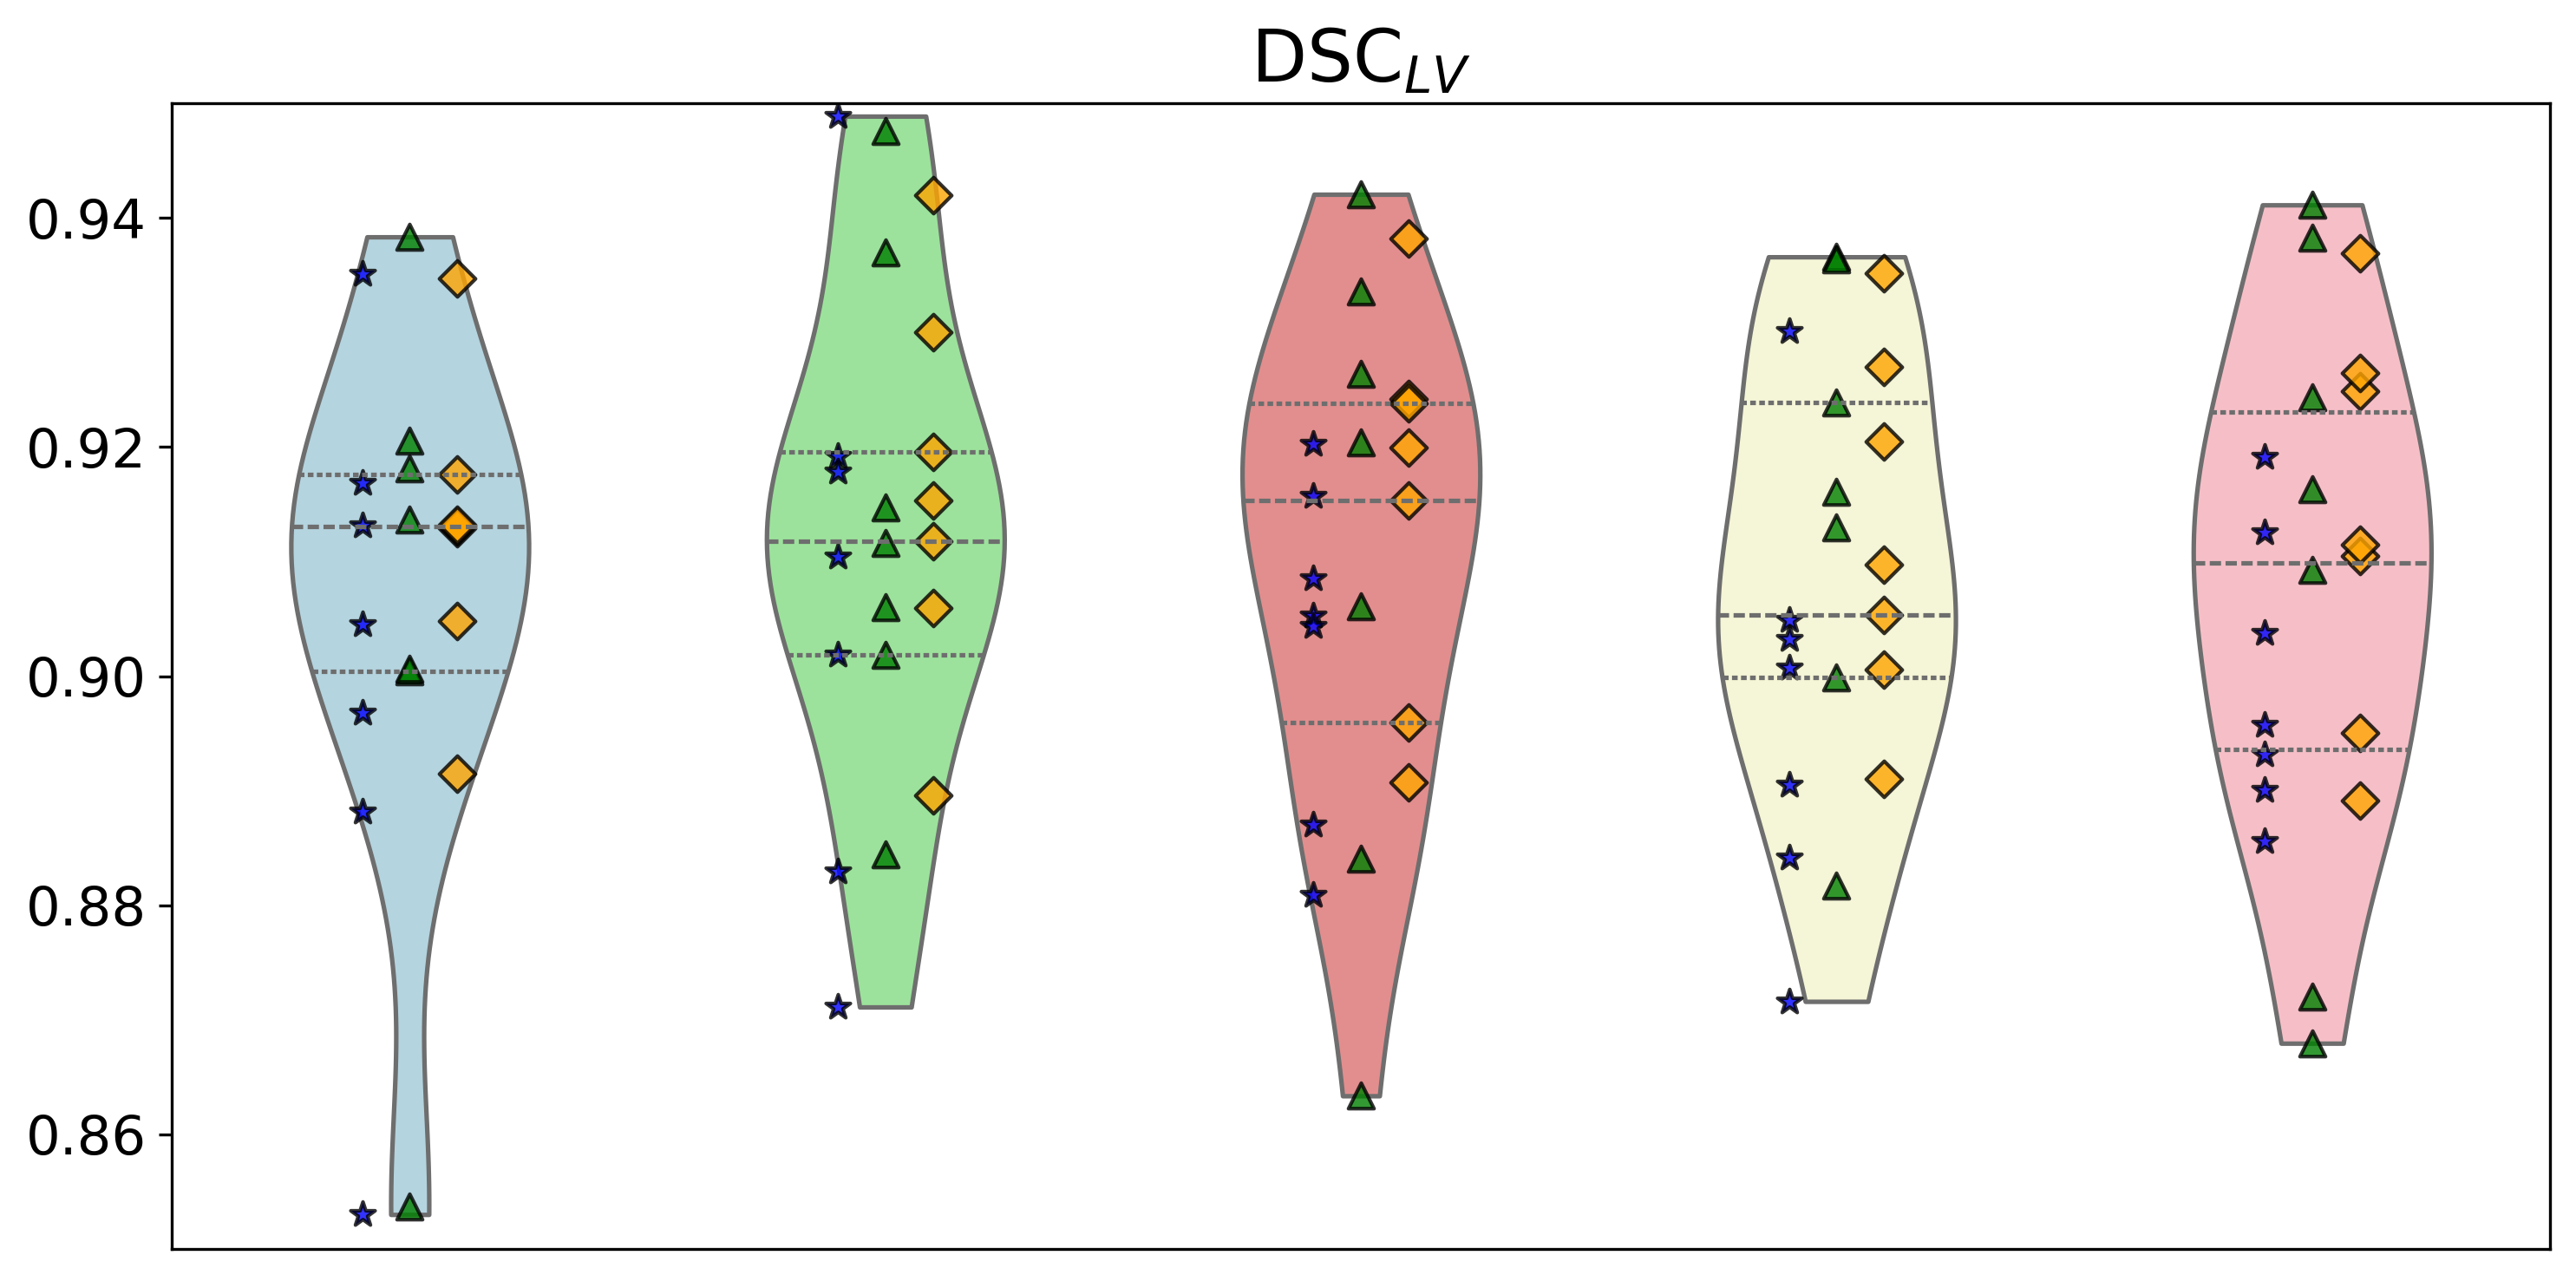

In [89]:
#!/usr/bin/env python3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# 1) Define your runs and their consistent names for filtering
runs = ['AVG', 'AVGMD', 'AVGMDE1', 'AVGMDFA', 'all']
run_titles = {
    'AVG': 'DWI_avg',
    'AVGMD': 'DWI_avg & MD',
    'AVGMDE1': 'DWI_avg & MD & E1',
    'AVGMDFA': 'DWI_avg & MD & FA',
    'all': 'DWI_avg & MD & E1 & FA'
}

# 2) Path to the folder holding your Excel files
main_dir = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'

# 3) Initialize list for data
all_data = []

# 4) Read, process, and append each run
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    print(f"Loading file: {excel_file_path}")
    
    # Force `Slice Number` to load as text
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    print(f"Initial data loaded for run '{run}':\n{df.head()}")
    
    # Ensure `Slice Number` is zero-padded
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    
    # Inspect slice mapping
    print(f"Slice mapping for run '{run}':\n{df[['Slice Number', 'Slice Name']].drop_duplicates()}")
    
    df['Dice Score'] = df['Dice Score Original Label 1']
    df['Dataset'] = run_titles[run]
    
    # Check dataset assignment
    print(f"Dataset assigned for run '{run}': {df['Dataset'].unique()}")
    
    all_data.append(df)

# Combine all data into a single DataFrame
combined_df = pd.concat(all_data, ignore_index=True)
print(f"Combined DataFrame shape: {combined_df.shape}")
print(f"Dataset distribution:\n{combined_df['Dataset'].value_counts()}")
print(f"Slice distribution by dataset:\n{combined_df.groupby(['Dataset', 'Slice Name']).size()}")

# 5) Plotting parameters
marker_mapping = {'Apex': '*', 'Mid': '^', 'Base': 'D'}
offset_mapping = {'Apex': -0.1, 'Mid': 0.0, 'Base': 0.1}
slice_color_mapping = {'Apex': 'blue', 'Mid': 'green', 'Base': 'orange'}
dataset_palette = {
    'DWI_avg': 'lightblue',
    'DWI_avg & MD': 'lightgreen',
    'DWI_avg & MD & E1': 'lightcoral',
    'DWI_avg & MD & FA': 'lightgoldenrodyellow',
    'DWI_avg & MD & E1 & FA': 'lightpink'
}

plt.figure(figsize=(10, 5), dpi=300)
plt.title("DSC$_{LV}$", fontsize=20)

sns.violinplot(
    x='Dataset',
    y='Dice Score',
    hue='Dataset',
    data=combined_df,
    palette=dataset_palette,
    cut=0,
    inner='quartile',
    width=0.5,
    dodge=False
)

x_labels = [
    'DWI_avg',
    'DWI_avg & MD',
    'DWI_avg & MD & E1',
    'DWI_avg & MD & FA',
    'DWI_avg & MD & E1 & FA'
]

# Debug scatter points
for idx, dataset_name in enumerate(x_labels):
    df_subset = combined_df[combined_df['Dataset'] == dataset_name]
    print(f"Dataset: {dataset_name}, Subset size: {df_subset.shape}")
    
    for slice_name in ['Apex', 'Mid', 'Base']:
        df_slice = df_subset[df_subset['Slice Name'] == slice_name]
        print(f"  Slice: {slice_name}, Rows: {len(df_slice)}")
        
        if not df_slice.empty:
            x_offset = idx + offset_mapping[slice_name]
            print(f"    Scatter plot: x_offset={x_offset}, Dice Scores={df_slice['Dice Score'].values}")
            plt.scatter(
                [x_offset] * len(df_slice),
                df_slice['Dice Score'],
                marker=marker_mapping[slice_name],
                color=slice_color_mapping[slice_name],
                edgecolor='k',
                s=50,
                alpha=0.8
            )

plt.legend([], [], frameon=False)
plt.xlabel("")
# Set custom tick labels for display purposes only
plt.xticks('')
plt.ylabel('')
plt.ylim(0.85, 0.95)
plt.xlim(-0.5, 4.5)

plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()


/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_58659/4078994289.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Slice Name'].fillna('Unknown', inplace=True)
/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_58659/4078994289.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

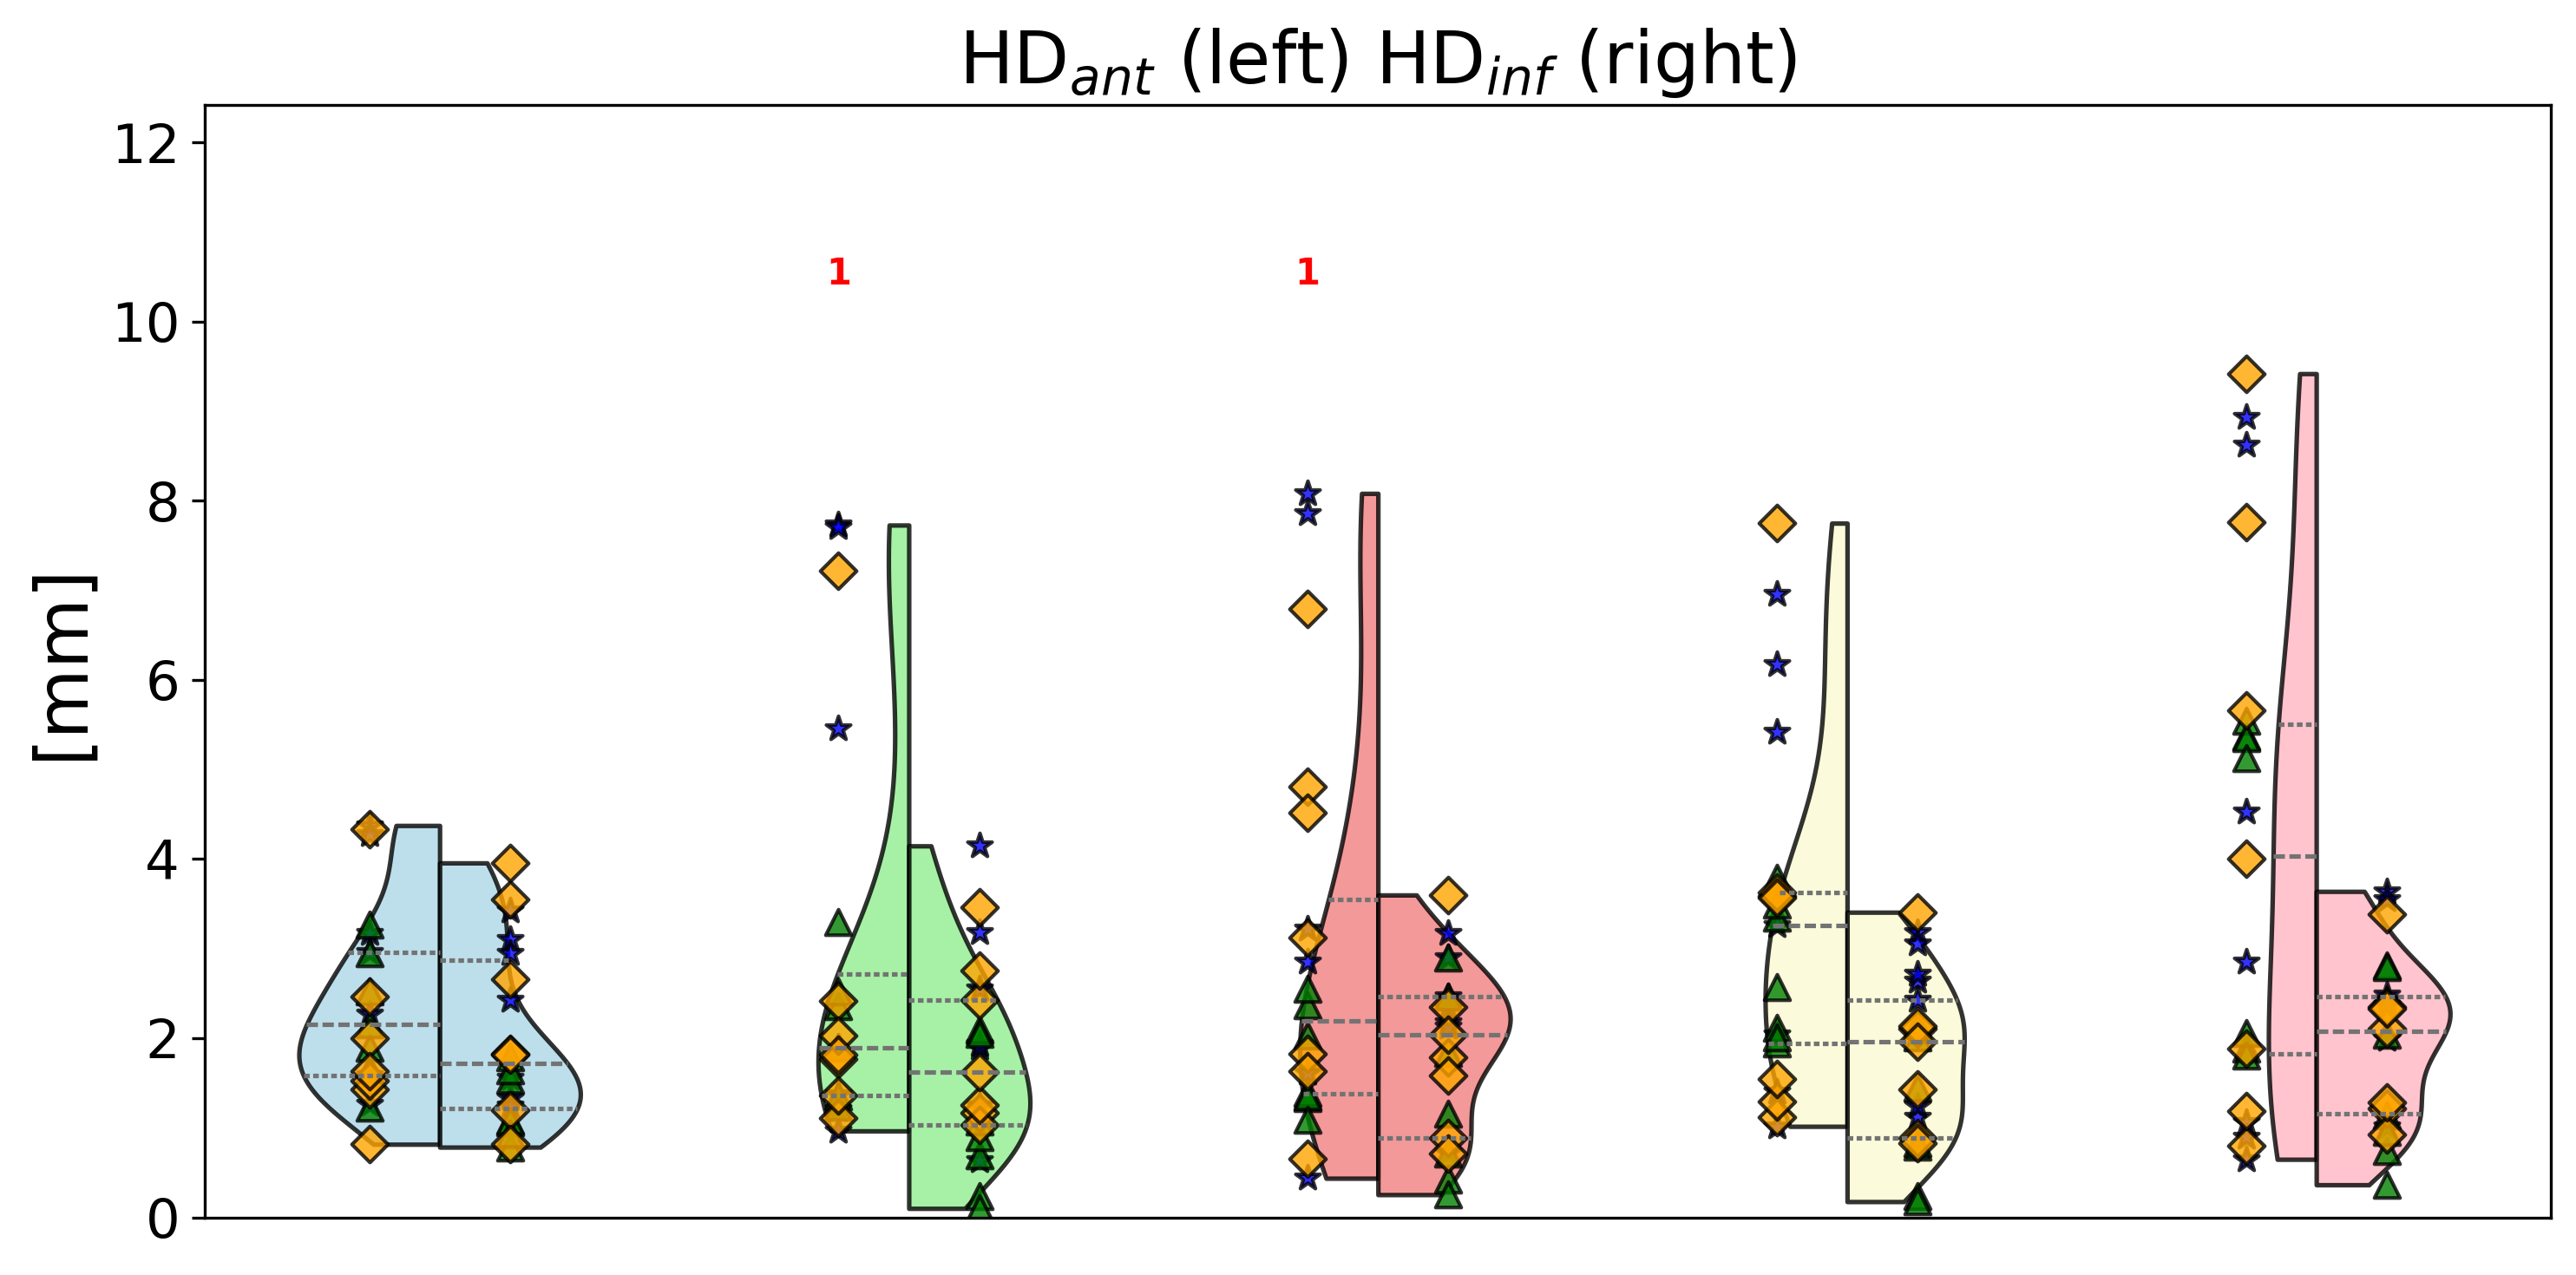

In [88]:
#!/usr/bin/env python3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from matplotlib.collections import PolyCollection  # For grabbing the violin polygons

# Define runs and corresponding dataset names
runs = ['AVG', 'AVGMD', 'AVGMDE1', 'AVGMDFA', 'all']
run_titles = {
    'AVG': 'DWI_avg',
    'AVGMD': 'DWI_avg & MD',
    'AVGMDE1': 'DWI_avg & MD & E1',
    'AVGMDFA': 'DWI_avg & MD & FA',
    'all': 'DWI_avg & MD & E1 & FA'
}

# Path to the Excel data
main_dir = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'

# Load data from each Excel file
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    
    # Zero-pad slice numbers and map names
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    # Create separate L2, L3 entries
    df_label2 = df.copy()
    df_label3 = df.copy()
    
    df_label2['HD'] = df_label2['Hausdorff Distance Label 2']
    df_label2['Label Type'] = 'L2'
    df_label2['Dataset'] = run_titles[run]

    df_label3['HD'] = df_label3['Hausdorff Distance Label 3']
    df_label3['Label Type'] = 'L3'
    df_label3['Dataset'] = run_titles[run]

    all_data.extend([df_label2, df_label3])

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)

# Identify inliers/outliers
threshold = 100
combined_df['Value Type'] = combined_df['HD'].apply(
    lambda x: 'Outlier' if x > threshold else 'Inlier'
)

# Count extreme failures (HD > 1000)
failure_threshold = 1000
failure_counts = (
    combined_df[combined_df['HD'] > failure_threshold]
    .groupby(['Dataset', 'Label Type'])
    .size()
)
failure_counts_dict = failure_counts.to_dict()

# Plotting parameters
marker_mapping = {'Apex': '*', 'Mid': '^', 'Base': 'D'}
slice_color_mapping = {'Apex': 'blue', 'Mid': 'green', 'Base': 'orange'}

# Desired dataset colors for the violin fill
dataset_palette = {
    'DWI_avg': 'lightblue',
    'DWI_avg & MD': 'lightgreen',
    'DWI_avg & MD & E1': 'lightcoral',
    'DWI_avg & MD & FA': 'lightgoldenrodyellow',
    'DWI_avg & MD & E1 & FA': 'lightpink'
}

plt.figure(figsize=(10, 5), dpi=300)
plt.title("HD$_{ant}$ (left) HD$_{inf}$ (right)", fontsize=20)

# Compute the max HD among inliers for y‐label placement
max_hd_inliers = combined_df[combined_df['Value Type'] == 'Inlier']['HD'].max()
y_text_offset = max_hd_inliers + 1

# === 1) Draw the violin plot with a “throwaway” palette (e.g. "pastel") ===
ax = sns.violinplot(
    x='Dataset',
    y='HD',
    hue='Label Type',
    data=combined_df[combined_df['Value Type'] == 'Inlier'], 
    split=True,
    palette="pastel",  # <--- placeholder
    cut=0,
    inner='quartile',
    width=0.6,
    order=run_titles.values(),   # ensure consistent x order
    hue_order=['L2', 'L3']       # ensure L2-left, L3-right
)
#Remove naming again!
ax.set_xlabel("")

# === 2) Post‐hoc color correction: each dataset gets its color for both halves ===
# Seaborn creates one PolyCollection for each side of the split, so for N datasets
# we get 2*N polygons. We simply set both halves to the same color:
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
datasets_ordered = list(run_titles.values())  # ["DWI_avg", "DWI_avg & MD", ...]
for i, poly in enumerate(poly_collection):
    dataset_index = i // 2  # integer division: 2 polygons per dataset
    dataset_name = datasets_ordered[dataset_index]
    color = dataset_palette[dataset_name]
    poly.set_facecolor(color)
    poly.set_edgecolor("black")  # optional: outline in black
    poly.set_alpha(0.8)          # optional: tweak transparency

# === Add your scatter markers, failure counts, etc. exactly as before ===
# Scatter for apex, mid, base
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['L2', 'L3'], [-0.15, 0.15]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) & 
            (combined_df['Label Type'] == label_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                plt.scatter(
                    [idx + offset] * len(df_slice),
                    df_slice['HD'],
                    marker=marker_mapping[slice_name],
                    color=slice_color_mapping[slice_name],
                    edgecolor='k',
                    s=50,
                    alpha=0.8
                )

# Show failure counts above violin
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['L2', 'L3'], [-0.15, 0.15]):
        count = failure_counts_dict.get((dataset_name, label_type), 0)
        if count > 0:
            plt.text(
                idx + offset,
                y_text_offset,
                s=str(count),
                ha='center',
                fontsize=10,
                color='red',
                fontweight='bold'
            )

# Overlay scatter for outliers
outliers = combined_df[combined_df['Value Type'] == 'Outlier']
for label_type, offset in zip(['L2', 'L3'], [-0.15, 0.15]):
    df_outliers = outliers[outliers['Label Type'] == label_type]
    plt.scatter(
        df_outliers['Dataset'].map({k: i for i, k in enumerate(run_titles.values())}) + offset,
        df_outliers['HD'],
        color='red',
        edgecolor='k',
        s=50,
        alpha=0.8
    )

plt.xticks('')
plt.ylabel("[mm]", fontsize=20)
plt.ylim(0, 0.5)
plt.ylim(0, y_text_offset + 2)
plt.xlim(-0.5, 4.5)
plt.yticks(fontsize=15)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_58659/4205642466.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Slice Name'].fillna('Unknown', inplace=True)
/var/folders/9r/mlgf66555t98p7ptk_n0g21r0000gn/T/ipykernel_58659/4205642466.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

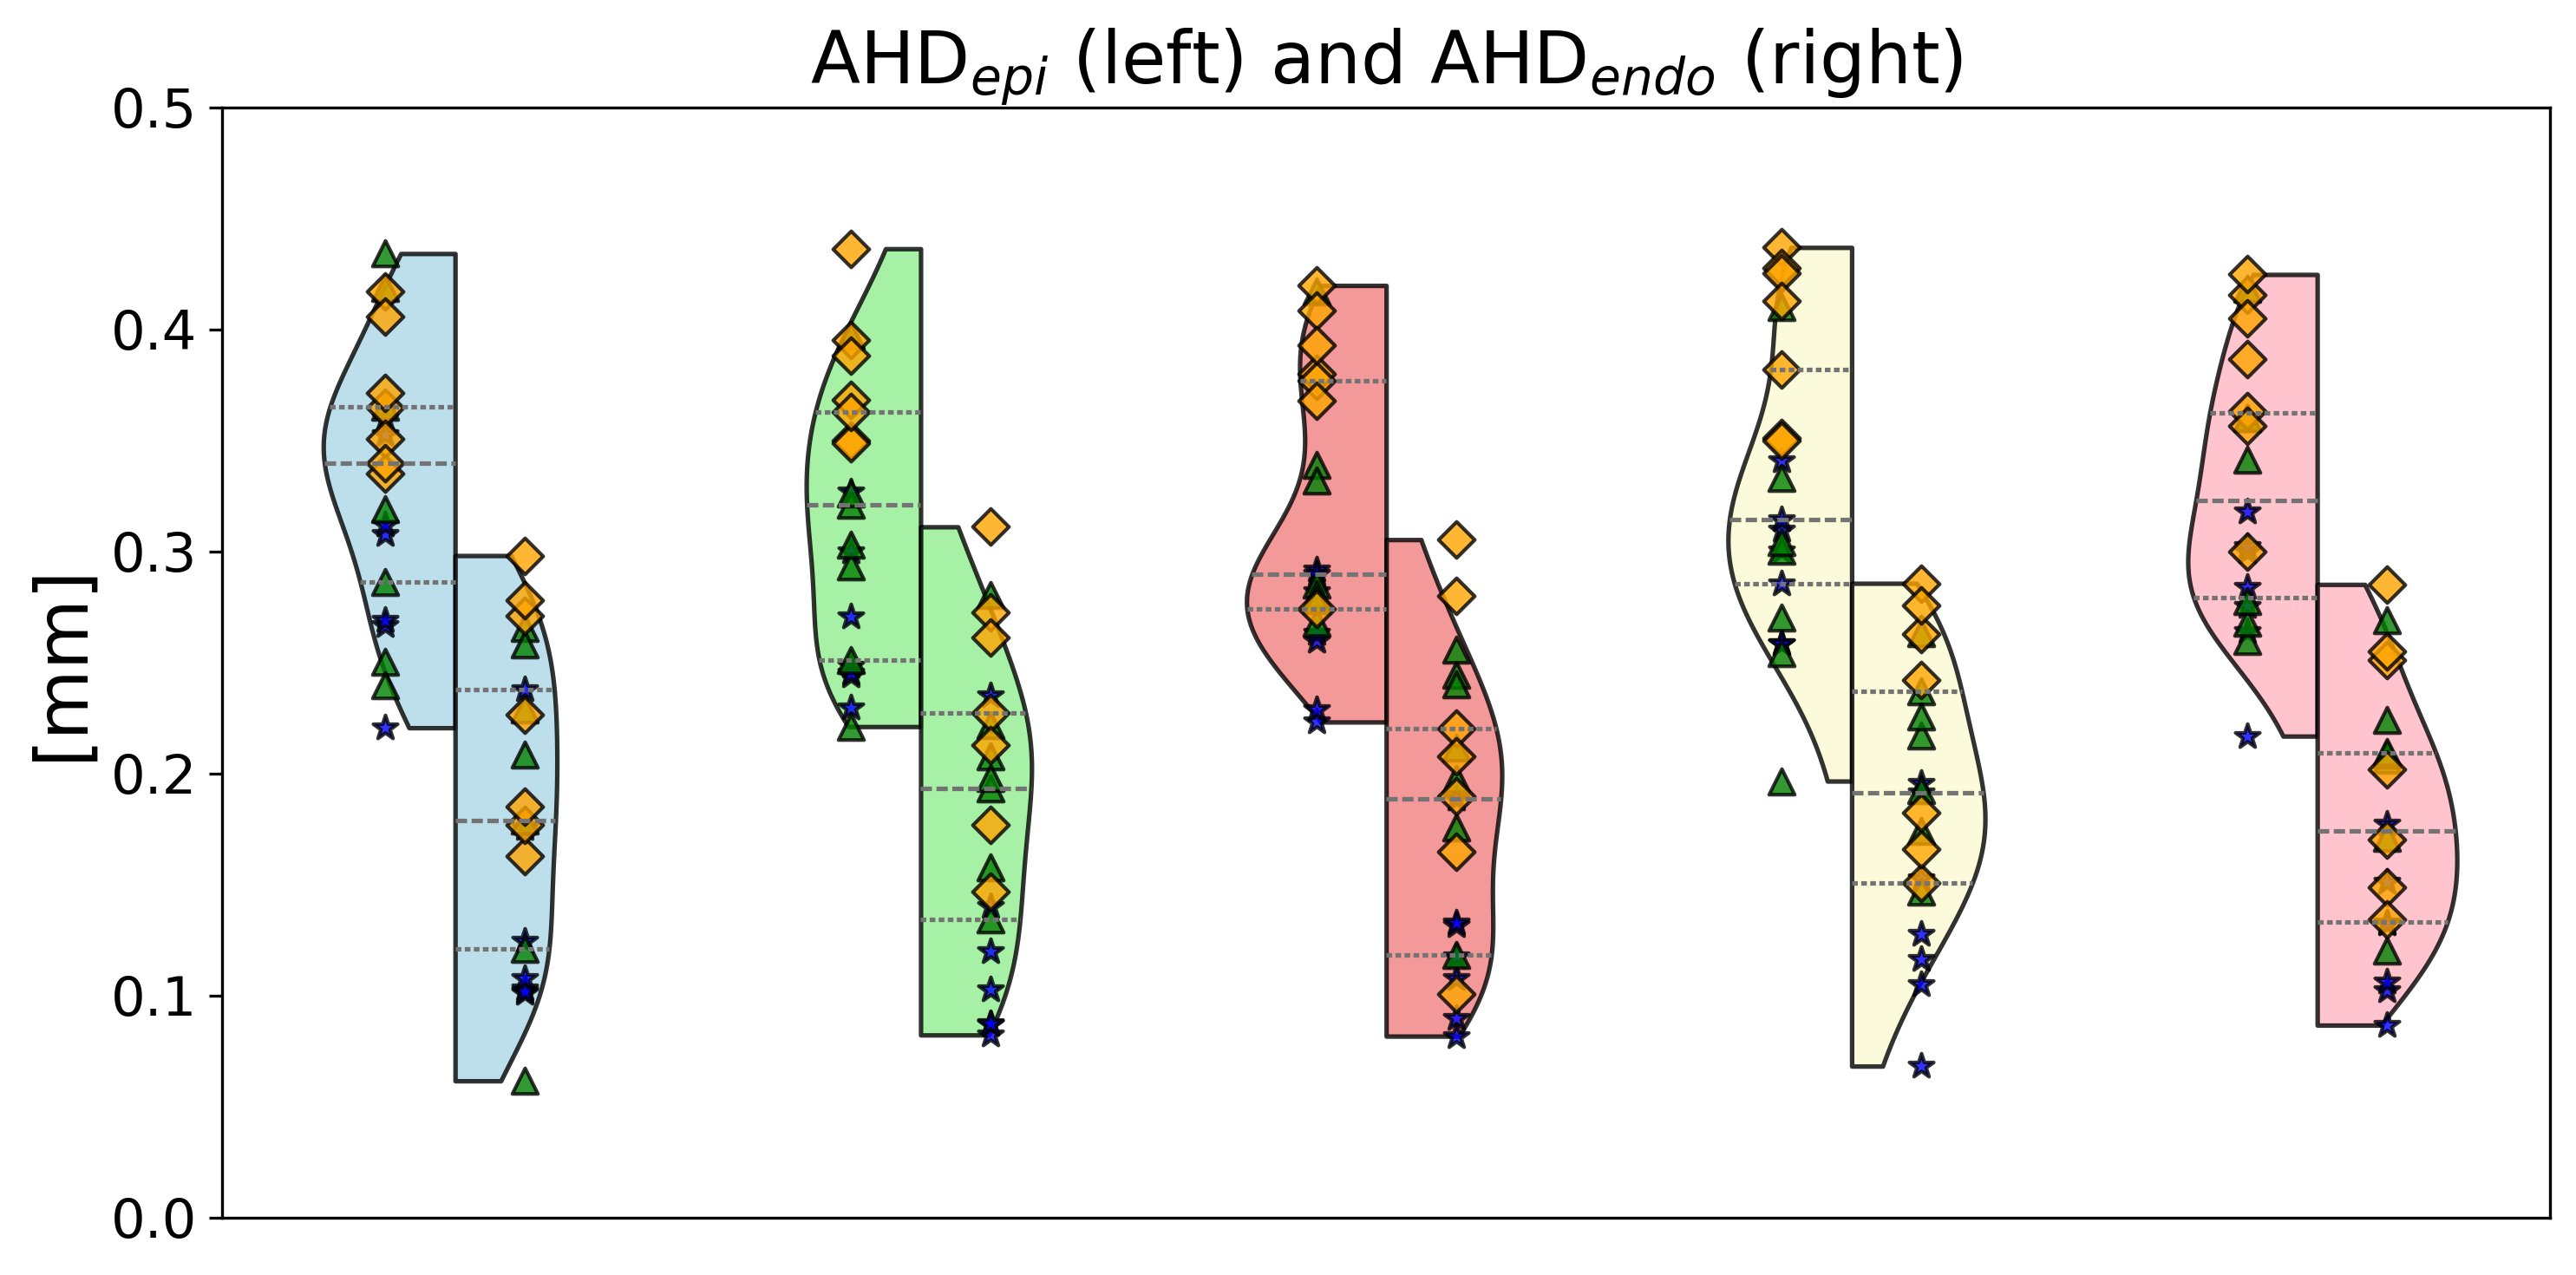

In [87]:
#!/usr/bin/env python3

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

from matplotlib.collections import PolyCollection

# Define runs and corresponding dataset names
runs = ['AVG', 'AVGMD', 'AVGMDE1', 'AVGMDFA', 'all']
run_titles = {
    'AVG': 'DWI_avg',
    'AVGMD': 'DWI_avg & MD',
    'AVGMDE1': 'DWI_avg & MD & E1',
    'AVGMDFA': 'DWI_avg & MD & FA',
    'all': 'DWI_avg & MD & E1 & FA'
}

# Path to the Excel data (adjust to your path)
main_dir = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'

# Load data from each Excel file
all_data = []
for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
    
    # Zero-pad slice numbers and map names
    df['Slice Number'] = df['Slice Number'].str.zfill(3)
    slice_name_mapping = {'001': 'Apex', '002': 'Mid', '003': 'Base'}
    df['Slice Name'] = df['Slice Number'].map(slice_name_mapping)
    df['Slice Name'].fillna('Unknown', inplace=True)
    
    # Create separate Epi / Endo entries
    df_epi = df.copy()
    df_endo = df.copy()
    
    # Pull values from the new columns
    df_epi['HD'] = df_epi['Avg. HD Epi']
    df_epi['Label Type'] = 'Epi'
    df_epi['Dataset'] = run_titles[run]

    df_endo['HD'] = df_endo['Avg. HD Endo']
    df_endo['Label Type'] = 'Endo'
    df_endo['Dataset'] = run_titles[run]

    all_data.extend([df_epi, df_endo])

# Combine all data
combined_df = pd.concat(all_data, ignore_index=True)

# Identify inliers/outliers (same threshold as before—adjust if desired)
threshold = 100
combined_df['Value Type'] = combined_df['HD'].apply(
    lambda x: 'Outlier' if x > threshold else 'Inlier'
)

# Count extreme failures (HD > 1000), if relevant
failure_threshold = 1000
failure_counts = (
    combined_df[combined_df['HD'] > failure_threshold]
    .groupby(['Dataset', 'Label Type'])
    .size()
)
failure_counts_dict = failure_counts.to_dict()

# Plotting parameters
marker_mapping = {'Apex': '*', 'Mid': '^', 'Base': 'D'}
slice_color_mapping = {'Apex': 'blue', 'Mid': 'green', 'Base': 'orange'}

# Desired dataset colors for the violin fill
dataset_palette = {
    'DWI_avg': 'lightblue',
    'DWI_avg & MD': 'lightgreen',
    'DWI_avg & MD & E1': 'lightcoral',
    'DWI_avg & MD & FA': 'lightgoldenrodyellow',
    'DWI_avg & MD & E1 & FA': 'lightpink'
}

plt.figure(figsize=(10, 5), dpi=300)
plt.title("AHD$_{epi}$ (left) and AHD$_{endo}$ (right)", fontsize=20)

# Compute the max HD among inliers for y‐label placement
max_hd_inliers = combined_df[combined_df['Value Type'] == 'Inlier']['HD'].max()
y_text_offset = max_hd_inliers + 1

# === 1) Draw the violin plot with a “throwaway” palette (placeholder) ===
ax = sns.violinplot(
    x='Dataset',
    y='HD',
    hue='Label Type', 
    data=combined_df[combined_df['Value Type'] == 'Inlier'], 
    split=True,
    palette="pastel",  # placeholder, we will overwrite
    cut=0,
    inner='quartile',
    width=0.6,
    order=run_titles.values(),
    hue_order=['Epi', 'Endo']  # Epi on left, Endo on right
)
ax.set_xlabel("")

# === 2) Post‐hoc color correction: each dataset => single color for both halves ===
poly_collection = [pc for pc in ax.collections if isinstance(pc, PolyCollection)]
datasets_ordered = list(run_titles.values())  # [ "DWI_avg", "DWI_avg & MD", ...]
for i, poly in enumerate(poly_collection):
    dataset_index = i // 2  # 2 polygons (Epi, Endo) per dataset
    dataset_name = datasets_ordered[dataset_index]
    color = dataset_palette[dataset_name]
    poly.set_facecolor(color)
    poly.set_edgecolor("black")  # optional outline
    poly.set_alpha(0.8)          # optional transparency

# === Scatter for apex, mid, base (markers on top of violins) ===
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['Epi', 'Endo'], [-0.15, 0.15]):
        df_subset = combined_df[
            (combined_df['Dataset'] == dataset_name) & 
            (combined_df['Label Type'] == label_type)
        ]
        for slice_name in ['Apex', 'Mid', 'Base']:
            df_slice = df_subset[df_subset['Slice Name'] == slice_name]
            if not df_slice.empty:
                plt.scatter(
                    [idx + offset] * len(df_slice),
                    df_slice['HD'],
                    marker=marker_mapping[slice_name],
                    color=slice_color_mapping[slice_name],
                    edgecolor='k',
                    s=50,
                    alpha=0.8
                )

# === Show failure counts above violin, if any ===
for idx, dataset_name in enumerate(run_titles.values()):
    for label_type, offset in zip(['Epi', 'Endo'], [-0.15, 0.15]):
        count = failure_counts_dict.get((dataset_name, label_type), 0)
        if count > 0:
            plt.text(
                idx + offset,
                y_text_offset,
                s=str(count),
                ha='center',
                fontsize=10,
                color='red',
                fontweight='bold'
            )

# === Overlay scatter for “Outliers” ===
outliers = combined_df[combined_df['Value Type'] == 'Outlier']
for label_type, offset in zip(['Epi', 'Endo'], [-0.15, 0.15]):
    df_outliers = outliers[outliers['Label Type'] == label_type]
    plt.scatter(
        df_outliers['Dataset'].map({k: i for i, k in enumerate(run_titles.values())}) + offset,
        df_outliers['HD'],
        color='red',
        edgecolor='k',
        s=50,
        alpha=0.8
    )

# Setup x/y ticks, labels
plt.xticks('')
plt.ylabel("[mm]", fontsize=20)
plt.ylim(0, 0.5)
plt.xlim(-0.5, 4.5)
plt.yticks(fontsize=15)

# Remove the legend (optional)
plt.legend([], [], frameon=False)

plt.tight_layout()
plt.show()


In [86]:
import pandas as pd
import os

# === Define Runs and Corresponding Dataset Names ===
runs = ['AVG', 'AVGMD', 'AVGMDE1', 'AVGMDFA', 'all']
run_titles = {
    'AVG': 'DWI_avg',
    'AVGMD': 'DWI_avg & MD',
    'AVGMDE1': 'DWI_avg & MD & E1',
    'AVGMDFA': 'DWI_avg & MD & FA',
    'all': 'DWI_avg & MD & E1 & FA'
}

# === Path to the Excel Data ===
main_dir = '/Users/saschastocker/Documents/Stanford/work2024/FIMH2025/PaperResults'

# === Load Data from Each Excel File ===
all_data = []

for run in runs:
    excel_file_path = os.path.join(
        main_dir,
        f"HannumVol3specificNorm100EpochSpecficNorm_fold2_{run}_withGTCrop_discoanddirvsagdataDataAugTrainerPAPERRESULTS.xlsx"
    )
    
    if os.path.exists(excel_file_path):  # Ensure file exists
        df = pd.read_excel(excel_file_path, dtype={'Slice Number': str})
        df['Dataset'] = run_titles[run]  # Assign dataset label
        all_data.append(df)

# === Combine All Data into One DataFrame ===
combined_df = pd.concat(all_data, ignore_index=True)

# === Drop Non-Numeric Columns ===
df_numeric = combined_df.drop(columns=["Case ID", "Slice Number"], errors="ignore")

# === Compute Summary Statistics (Mean, Min, Max) Per Dataset ===
summary_stats = df_numeric.groupby("Dataset").agg(['mean', 'min', 'max'])

# === Reformat Table: Rows as Metrics, Columns as Datasets ===
summary_stats = summary_stats.transpose()

# === Save to CSV (Optional) ===
summary_stats.to_csv("summary_statistics_transposed.csv")

# === Print Summary Table ===
import tabulate
print(tabulate.tabulate(summary_stats, headers="keys", tablefmt="pretty"))
# Save to CSV
summary_stats.to_csv("summary_statistics_transposed.csv")

print("Saved as summary_statistics_transposed.csv in the current directory.")


+------------------------------------------------------+----------------------+----------------------+-----------------------+------------------------+-----------------------+
|                                                      |       DWI_avg        |     DWI_avg & MD     |   DWI_avg & MD & E1   | DWI_avg & MD & E1 & FA |   DWI_avg & MD & FA   |
+------------------------------------------------------+----------------------+----------------------+-----------------------+------------------------+-----------------------+
|                ('Dice Crop', 'mean')                 |  0.9427530463665683  |  0.9427493025947165  |  0.9427493025947165   |   0.9427530463665682   |  0.9427530463665683   |
|                 ('Dice Crop', 'min')                 |  0.9052869663556686  |  0.9052869663556686  |  0.9052869663556686   |   0.9052869663556686   |  0.9052869663556686   |
|                 ('Dice Crop', 'max')                 |         0.98         |         0.98         |         0.98     